<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import requests, zipfile
from io import BytesIO
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans

In [16]:
# importing necessary modules
print('Downloading started')

#Defining the zip file URL
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
#zipfile= zipfile.ZipFile(BytesIO(req.content))
#zipfile.extractall('datos_agua/')

# Aguas superficiales

In [17]:
file_n='datos_agua/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
with open(file_n) as f:
    print(f.encoding)
df=pd.read_csv(file_n,encoding=f.encoding)
df.head()

cp1252


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [18]:
df.dtypes

CLAVE                      object
SITIO                      object
ORGANISMO_DE_CUENCA        object
ESTADO                     object
MUNICIPIO                  object
CUENCA                     object
CUERPO DE AGUA             object
TIPO                       object
SUBTIPO                    object
LONGITUD                  float64
LATITUD                   float64
PERIODO                   float64
DBO_mg/L                   object
CALIDAD_DBO                object
DQO_mg/L                   object
CALIDAD_DQO                object
SST_mg/L                   object
CALIDAD_SST                object
COLI_FEC_NMP_100mL         object
CALIDAD_COLI_FEC           object
E_COLI_NMP_100mL           object
CALIDAD_E_COLI             object
ENTEROC_NMP_100mL          object
CALIDAD_ENTEROC            object
OD_PORC                    object
CALIDAD_OD_PORC            object
OD_PORC_SUP                object
CALIDAD_OD_PORC_SUP        object
OD_PORC_MED                object
CALIDAD_OD_POR

In [19]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [20]:
df.shape

(4141, 55)

In [21]:
df.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [22]:
df.mean()

C:\Users\monit\AppData\Local\Temp\ipykernel_20380\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


LONGITUD                  -100.359969
LATITUD                     21.046992
PERIODO                   2020.000000
TOX_D_48_FON_UT                   NaN
CALIDAD_TOX_D_48_FON              NaN
TOX_FIS_FON_15_UT                 NaN
CALIDAD_TOX_FIS_FON_15            NaN
dtype: float64

In [23]:
df.corr()

C:\Users\monit\AppData\Local\Temp\ipykernel_20380\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
LONGITUD,1.000000,-0.713966,NaN,NaN,NaN,NaN,NaN
LATITUD,-0.713966,1.000000,NaN,NaN,NaN,NaN,NaN
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOX_D_48_FON_UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CALIDAD_TOX_D_48_FON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOX_FIS_FON_15_UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CALIDAD_TOX_FIS_FON_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isnull().sum(axis = 0).sort_values(ascending=False)


CALIDAD_TOX_FIS_FON_15    4141
TOX_FIS_FON_15_UT         4141
CALIDAD_TOX_D_48_FON      4141
TOX_D_48_FON_UT           4141
CALIDAD_OD_PORC_MED       3654
OD_PORC_MED               3654
CALIDAD TOX_D_48_SUP      3379
TOX_D_48_SUP_UT           3379
CALIDAD_ENTEROC           3237
ENTEROC_NMP_100mL         3237
CALIDAD_OD_PORC_FON       3195
OD_PORC_FON               3195
CALIDAD_OD_PORC_SUP       2522
OD_PORC_SUP               2522
TOX_FIS_SUP_15_UT         2467
CALIDAD_TOX_FIS_SUP_15    2467
CALIDAD_OD_PORC           2344
OD_PORC                   2344
TOX_D_48_UT               2325
CALIDAD_TOX_D_48          2325
CALIDAD_TOX_V_15          2322
TOX_V_15_UT               2322
CONTAMINANTES             1915
CALIDAD_DQO               1560
DQO_mg/L                  1560
CALIDAD_DBO               1560
DBO_mg/L                  1560
COLI_FEC_NMP_100mL        1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
CALIDAD_COLI_FEC          1559
CUERPO DE AGUA             662
SUBTIPO 

# Plots and cluster insight 

In [25]:
# Create a Map instance
mapa = folium.Map(location=[19.432608, -99.133209], tiles='Stamen Toner',
                   zoom_start=5.3, control_scale=True)

marker_cluster = MarkerCluster().add_to(mapa)
df_=df.dropna(subset=["LONGITUD","LATITUD"])
for index, row in df_.iterrows():
    
    folium.Marker([row.LATITUD,row.LONGITUD]).add_to(marker_cluster)#add_to(mapa).add_to(marker_cluster)

mapa

In [26]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()


,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [27]:
df_["Coordinates"] = list(zip(df_.LONGITUD, df_.LATITUD))
df_["Coordinates"] = df_["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_, geometry="Coordinates")

C:\Users\monit\AppData\Local\Temp\ipykernel_20380\3662323106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["Coordinates"] = list(zip(df_.LONGITUD, df_.LATITUD))
C:\Users\monit\AppData\Local\Temp\ipykernel_20380\3662323106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["Coordinates"] = df_["Coordinates"].apply(Point)


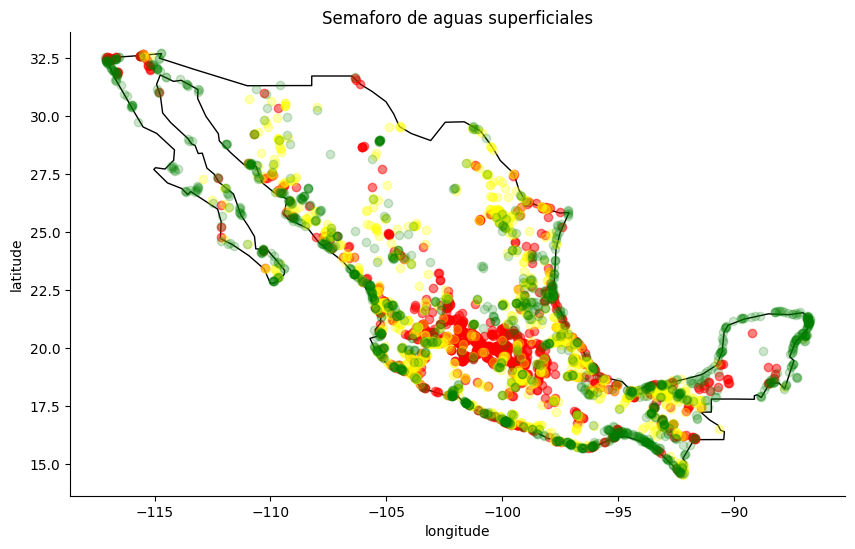

In [28]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf.loc[gdf.SEMAFORO=='Rojo'].plot(ax=gax, color='red', alpha = 0.5)
gdf.loc[gdf.SEMAFORO=='Amarillo'].plot(ax=gax, color='yellow', alpha = 0.3)
gdf.loc[gdf.SEMAFORO=='Verde'].plot(ax=gax, color='green', alpha = 0.2)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semaforo de aguas superficiales')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


## Clusters 

In [65]:
train_set=df_[["LONGITUD","LATITUD"]].to_numpy()
k=20
kmeans=KMeans(n_clusters=k).fit(train_set)
centros=kmeans.cluster_centers_
df_["cluster"]=kmeans.fit_predict(train_set)

C:\Users\monit\AppData\Local\Temp\ipykernel_20380\471826284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["cluster"]=kmeans.fit_predict(train_set)


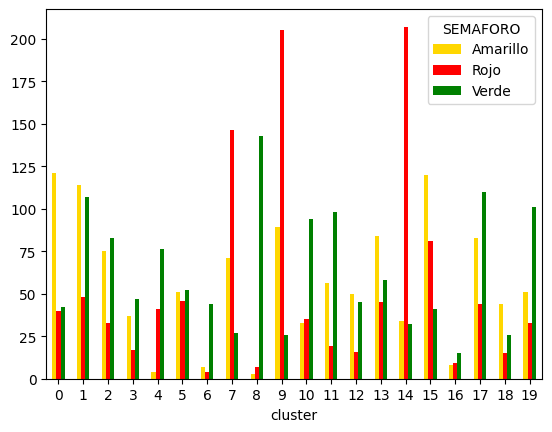

In [66]:
group_cluster=df_[["SEMAFORO","cluster"]].groupby(by=["cluster"]).value_counts().reset_index().rename(columns={0:'value'})
group_cluster=group_cluster.pivot(index='cluster', columns='SEMAFORO', values='value').reset_index()
ax = group_cluster.plot.bar(x='cluster',rot=0,color={"Amarillo": "gold", "Rojo": "red","Verde":"green"})

In [67]:
df_c=pd.DataFrame(centros,columns=["LONGITUD","LATITUD"])
df_c["Coordinates"] = list(zip(df_c.LONGITUD, df_c.LATITUD))
df_c["Coordinates"] = df_c["Coordinates"].apply(Point)
gdf_c = gpd.GeoDataFrame(df_c.dropna(subset=["LONGITUD","LATITUD"]), geometry="Coordinates")

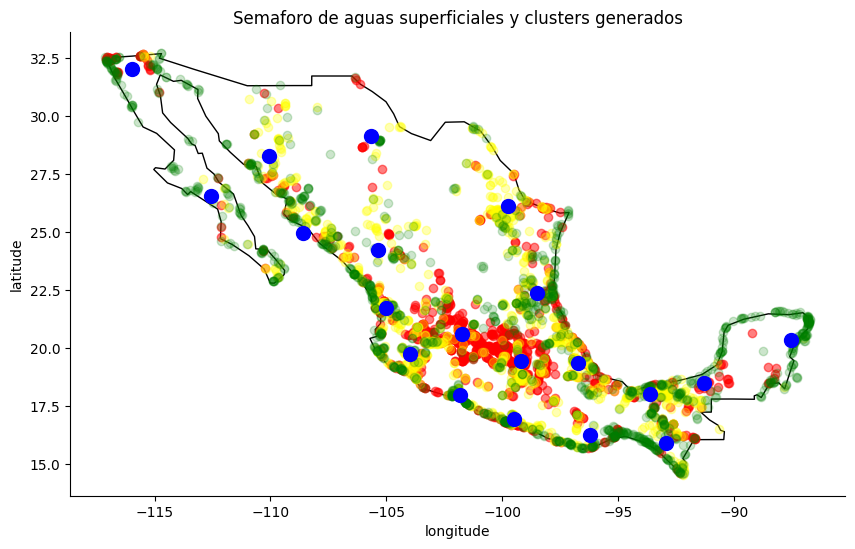

In [69]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf.loc[gdf.SEMAFORO=='Rojo'].plot(ax=gax, color='red', alpha = 0.5)
gdf.loc[gdf.SEMAFORO=='Amarillo'].plot(ax=gax, color='yellow', alpha = 0.3)
gdf.loc[gdf.SEMAFORO=='Verde'].plot(ax=gax, color='green', alpha = 0.2)
gdf_c.plot(ax=gax, color='Blue', alpha = 1,markersize=100)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semaforo de aguas superficiales y clusters generados')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)